<h1><center>Seminario de investigación II</center></h1>
<h2><center>Extracción de tópicos en en comentarios de aplicaciones móviles del sector bancario.</center></h2>

<h3><center>Dulce Maria Reyes Lucas</center></h3>

<h1><font color='BLUE'><span style='background :' > Descripción del problema </span></font></h1>
<p style='text-align: justify;'>
En los últimos años se ha presenciado el increíble crecimiento y uso de las redes sociales, blogs y demás medios que guardan principalmente textos, estos datos no estructurados se han convertido en el mayor interés de empresas principalmente, debido a que los datos estructurados no son capaces de mostrar tal juicio o sentimiento como se describe en los comentarios de las personas que expresan su sentir respecto a una infinidad de temas.

La pandemia obligó a todos los sectores a evolucionar y ofrecer mejores servicios y a la distancia de un clic, poder realizar pagos, recargar saldo, consultar los movimientos de su cuenta, obtener un estado de cuenta, hacer una cita, renovar un servicio, pero principalmente a los bancos, de poder ofrecer la mayoría de los servicios sin necesidad de acudir a una sucursal, por ello, se requiere de una aplicación móvil cada vez más robusta, intuitiva, que cubra estás necesidades y que deje satisfecho al usuario.

Por ello, iimplementaré un análisis de sentimiento y modelado de texto de las reseñas en Google Play y Apple Store orientado a la aplicación móvil de Santander para detectar las debilidades y fortalezas de las funcionalidades de dicha aplicación.
</p>
<h1><font color='BLUE'><span style='background :' > Objetivos </span></font></h1>
<p style='text-align: justify;'>

1)  Realización de web scrapping a las tiendas de aplicaciones con Python y posteriormente el procesamiento para obtener un conjunto de documentos listos para poder analizarlos de manera correcta.

2)  Aplicación del algoritmo de la distancia de Levenstein para corregir las palabras mal escritas por el usuario.

3)   Creación de modelos de texto para detectar los puntos de dolor en las funcionalidades de las aplicaciones móviles bancarias.

4)     Categorización de los tópicos generados por funcionalidad.

5)     Visualización de los tópicos generados a partir de la calificación otorgada por el usuario (5 estrellas)  mapeada como puntuación NPS (Detractor 1-3, Neutro 4, Promotor 5)
</p>
<h1><font color='BLUE'><span style='background :' > Proyectos relacionados </span></font></h1>

Con respecto al análisis y modelado de tópicos encontré algunos acercamientos y publicaciones, entre ellos los siguientes:


-Does the NPS® reflect consumer sentiment? A qualitative examination of the NPS using a sentiment analysis approach

-Sentiment analysis and topic extraction of the twitter network of #prayforparis 

-Modeling topic extraction-based sentiment analysis based on user reviews

-How can i improve my app? Classifying user reviews for software maintenance and evolution

-Covid-19 vaccine infodemic: sentiment analysis of the twitter content
</p>
<h1><font color='BLUE'><span style='background :' > Metodología </span></font></h1>

En mi experiencia estoy familiarizada con la metodología SEMMA, sin embargo, me gustaría utilizar la metodología KDD (Knowledge Data Discovery) para este proyecto.

Breve descripción de uso de la metodología:

<li>Selección de los datos: Los datos que usaré en este proyecto se encuentran en las tiendas de aplicaciones de Google y Apple Store, la forma de extracción será a través de una técnica llamada Web Scrapping y podremos extraer datos históricos. El proceso ya lo tengo listo.
</li>
<li>Preprocesamiento de los datos: En esta parte de la metodología se realizará la limpieza de los datos, en la que se realizarán tareas como conversión a minúsculas, eliminación de acentos y caracteres especiales, stemming, stopwords, aplicación del algoritmo de Levenstein para la corrección de las malas escrituras, dejar palabras con una longitud mínima de 5 caracteres e identificar entidades. Generar diccionarios propios de stopwords y si es posible de sinónimos.
</li>
<li>Transformación de los datos: Generar y entrenar modelos de extracción de tópicos y modelos de clasificación de sentimiento para alcanzar los objetivos.
</li>
<li>Interpretación y evaluación: Para este paso se compararán los resultados obtenidos en los modelos de sentimiento con matriz de confusión o alguna otra métrica de desempeño. Mostrar los tópicos finales que tengan una interpretación más clara. Los resultados serán mostrados en un dashboard en la herramienta de Power BI. 
</li>
</p>

<h1><font color='BLUE'><span style='background :' > Recopilación de la fuente de datos </span></font></h1>
<h1><font color='purple'><span style='background :' > ** Web Scrapping Google Play Store - SuperMóvil ** </span></font></h1>

In [29]:
import pandas as pd
from tqdm import tqdm
from google_play_scraper import Sort,reviews,reviews_all,app
from datetime import date
import datetime as dt
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import numpy as np

In [36]:
path='C:\\Users\\DULCE\\Documents\\dulce\\MAESTRIA\\TERCER SEMESTRE\\SEMINARIO DE PROYECTOS II\\PROYECTO MAESTRIA\\'

In [39]:
today=date.today()
d1=today.strftime("%Y_%m_%d")
print(d1)

2022_11_23


In [6]:
#   obtenemos el nombre("id") de la aplicación de santander "SuperMóvil" en la google play store 
#
#   https://play.google.com/store/apps/details?id=mx.bancosantander.supermovil&hl=es_MX&gl=US&pli=1
#
app_santander="mx.bancosantander.supermovil"

In [16]:
#   apuntando a descargar los comentarios de la aplicación en android

result,continuation_token= reviews(
    app_santander,   #aplicacion que vamos a descargar los comentarios
    lang='es',       #idiona en el que se encuentra
    country='mx',    #pais de publicación
    sort=Sort.NEWEST,#comentarios más nuevos o recientes
    count=50000,     #si existen, trae 50,000 comentarios, si no, trae todos los que hay
    filter_score_with=None
)

In [17]:
#   observamos el número de registros obtenidos 
print(len(result))
print(type(result))

50000
<class 'list'>


In [18]:
#   creando un dataframe de los resultados obtenidos
San_df=pd.DataFrame(result)
San_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),https://play-lh.googleusercontent.com/a-/ACNPE...,"Excelente App, por el momento todo Bien 🙂 👍🏼",5,0,5.72,2022-11-22 16:10:59,None,NaT
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,https://play-lh.googleusercontent.com/a/ALm5wu...,La peor app de un banco. No te permite ingresa...,1,1,5.72,2022-11-22 16:10:50,None,NaT


In [19]:
# observando las dimensiones del dataframe creado, veo que tenemos 30k registros y 10 columnas
San_df.shape

(50000, 10)

<h4><font color='purple'><span style='background :' > ** Preprocesamiento y manipulación datos google play store** </span></font></h4>

En esta parte principalmente haremos lo siguiente:

    *Eliminar stopwords
    *Quitar acéntos
    *Convertir a minúsculas
    *Quitar números y caracteres especiales
    *Creación de campos auxiliares

In [20]:
# Generando variables de hora y fecha
San_df["fecha"]=San_df["at"].dt.strftime("%Y-%m-%d")
San_df["hora"]=San_df["at"].dt.strftime("%H:%M:%S")
San_df["mes"]=San_df["at"].dt.strftime("%Y-%m")

In [21]:
San_df.mes.value_counts()

2022-09    8348
2022-07    6004
2022-05    5899
2022-10    5880
2022-04    5675
2022-08    5654
2022-06    5478
2022-11    3587
2022-03    3475
Name: mes, dtype: int64

Observo que en promedio hay 5,000 comentarios por mes, además hay datos desde el mes de marzo con el extracto que hicimos de 50,000 registros.

In [22]:
#  observando algunos registros del dataframe
San_df.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,fecha,hora,mes
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),https://play-lh.googleusercontent.com/a-/ACNPE...,"Excelente App, por el momento todo Bien 🙂 👍🏼",5,0,5.72,2022-11-22 16:10:59,None,NaT,2022-11-22,16:10:59,2022-11
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,https://play-lh.googleusercontent.com/a/ALm5wu...,La peor app de un banco. No te permite ingresa...,1,1,5.72,2022-11-22 16:10:50,None,NaT,2022-11-22,16:10:50,2022-11
2,d09036ac-5ef8-4ce9-80aa-3b0400eac5b7,juan miguelccftyi orozco lopez,https://play-lh.googleusercontent.com/a/ALm5wu...,Hay cosa que es muy difícil sacar y en sucursa...,3,0,5.72,2022-11-22 16:09:53,None,NaT,2022-11-22,16:09:53,2022-11
3,4f34a076-a80a-4efa-aee6-75ad40c1acdb,Karina Morales,https://play-lh.googleusercontent.com/a-/ACNPE...,Bien,5,0,5.72,2022-11-22 15:56:27,None,NaT,2022-11-22,15:56:27,2022-11


In [23]:
San_df.drop(columns=['userImage','repliedAt','replyContent'],inplace=True)
score_cat={1:"Detractor",2:"Detractor",3:"Detractor",4:"Neutro",5:"Promotor"}
San_df["score_cat"]=San_df["score"].map(score_cat)

In [24]:
San_df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,fecha,hora,mes,score_cat
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),"Excelente App, por el momento todo Bien 🙂 👍🏼",5,0,5.72,2022-11-22 16:10:59,2022-11-22,16:10:59,2022-11,Promotor
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,La peor app de un banco. No te permite ingresa...,1,1,5.72,2022-11-22 16:10:50,2022-11-22,16:10:50,2022-11,Detractor
2,d09036ac-5ef8-4ce9-80aa-3b0400eac5b7,juan miguelccftyi orozco lopez,Hay cosa que es muy difícil sacar y en sucursa...,3,0,5.72,2022-11-22 16:09:53,2022-11-22,16:09:53,2022-11,Detractor
3,4f34a076-a80a-4efa-aee6-75ad40c1acdb,Karina Morales,Bien,5,0,5.72,2022-11-22 15:56:27,2022-11-22,15:56:27,2022-11,Promotor
4,92caec58-d57e-4840-bc31-4ac7243e199b,Evelyn Zarza,Muy fácil de usar,5,0,5.72,2022-11-22 15:52:30,2022-11-22,15:52:30,2022-11,Promotor


En el dataframe anterior observo lo siguiente:

    reviewId - Identificador único del comentario
    userName - Nombre del usuario que dejó el comentario
    content  - Campo que contiene el texto escrito por el usuario
    score    - Calificación (de 1 a 5 estrellas) que dió el usuario
    thumbsUpCount - Número de usuarios que piensan o están de acuerdo con el comentario realizado
    reviewCreatedVersion - Versión de la aplicación de SuperMóvil
    at - Timestamp del comentario
    
    fecha - Campo definido por mi que divide el campo "at" con el atributo de fecha
    hora  - Campo definido por mi que divide el campo "at" con el atributo de hora
    mes   - Campo definido por mi que divide el campo "at" con el atributo del mes
    score_cat - Campo definido por mi para discretizar la calificación dada por el usuario y mapearla como NPS(Net Promoter Score)
    
    
    

In [23]:
def clean_re(txt):
    txt=pd.Series(txt).str.lower()
    txt=pd.Series(txt).apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    txt=txt.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    txt=pd.Series(txt).apply(lambda x: re.sub(r'\b\d+(?:\.\d+)?\s+',' ',x))
    return txt

In [26]:
df_santader=San_df[:]
df_santader.sort_values(by=["fecha","hora"],ascending=[0,0],inplace=True)
#  Filtrando el dataframe por el campo content que tenga una longitud de más de 1 caracter
df_santader=df_santader[df_santader.content.str.len()>1]
#  Convirtiendo el campo de texto a minúsculas
df_santader["texto"]=df_santader.content.str.lower()
#  Eliminando acéntos
a,b='áéíóú','aeiou'
trans=str.maketrans(a,b)
df_santader["texto"]=df_santader.texto.str.translate(trans)
df_santader["texto"]=df_santader['texto'].apply(clean_re)


In [27]:
df_santader.head(3)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,fecha,hora,mes,score_cat,texto
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),"Excelente App, por el momento todo Bien 🙂 👍🏼",5,0,5.72,2022-11-22 16:10:59,2022-11-22,16:10:59,2022-11,Promotor,excelente app por momento todo bien
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,La peor app de un banco. No te permite ingresa...,1,1,5.72,2022-11-22 16:10:50,2022-11-22,16:10:50,2022-11,Detractor,peor app banco permite ingresar tiene alertas ...
2,d09036ac-5ef8-4ce9-80aa-3b0400eac5b7,juan miguelccftyi orozco lopez,Hay cosa que es muy difícil sacar y en sucursa...,3,0,5.72,2022-11-22 16:09:53,2022-11-22,16:09:53,2022-11,Detractor,hay cosa que muy dificil sacar sucursal son na...


In [30]:
stopwords=set(stopwords.words("spanish"))

In [29]:
#   crear n nuevo campo llamado textom que no contenga las stopwords por defecto cargadas en python
for index,row in tqdm(df_santader.iterrows()):
    words=word_tokenize(row['texto'])
    filtro=[]
    for w in words:
        if w not in stopwords:
            filtro.append(w)
    df_santader.loc[index,'textom']=' '.join(filtro)
   

49757it [02:37, 316.78it/s]


In [30]:
df_santader['listas']=df_santader['textom'].str.split()

In [31]:
df_santader.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,fecha,hora,mes,score_cat,texto,textom,listas
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),"Excelente App, por el momento todo Bien 🙂 👍🏼",5,0,5.72,2022-11-22 16:10:59,2022-11-22,16:10:59,2022-11,Promotor,excelente app por momento todo bien,excelente app momento bien,"[excelente, app, momento, bien]"
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,La peor app de un banco. No te permite ingresa...,1,1,5.72,2022-11-22 16:10:50,2022-11-22,16:10:50,2022-11,Detractor,peor app banco permite ingresar tiene alertas ...,peor app banco permite ingresar alertas cierra...,"[peor, app, banco, permite, ingresar, alertas,..."


In [32]:
# revisando que no haya números en el campo de texti nuevamente
df_santader=df_santader[df_santader['textom'].str.isnumeric()==False]
df_santader=df_santader[df_santader['textom'].notna()]

In [33]:
df_santader.shape

(49746, 14)

In [34]:
# creando el conteo de palabras presentes para generar una lista propia de stopwords y eliminar ruido en los topicos

palabras=[]
for i,row in df_santader.iterrows():
    for j,palabra in enumerate(row['listas']):
        palabras.append(palabra)
print(len(palabras))

263267


In [36]:
from collections import Counter

recuento=Counter(palabras)
df_conteo=pd.DataFrame.from_dict(recuento,orient='index').reset_index()
df_conteo.sort_values(by=0,ascending=0,inplace=True)
df_conteo.head(8)

,index,0
17,aplicacion,10095
42,buena,9938
1,app,8607
0,excelente,8063
3,bien,4025
32,facil,3320
93,hacer,3217
5,banco,2980


In [40]:
df_conteo.shape
df_conteo.to_excel(f"{path}palabras.xlsx",index=False)

In [42]:
df_santader.to_excel(f"{path}df_santader_{d1}.xlsx",index=False)

In [50]:
df_santader=pd.read_excel(f"{path}df_santader_{d1}.xlsx")

In [53]:
#  Filtrando dataset con el que trabajaré posteriormente

df_santadervf=df_santader[["reviewId","userName","score","thumbsUpCount","reviewCreatedVersion","fecha","hora","score_cat","textom","mes"]]
df_santadervf.head()

,reviewId,userName,score,thumbsUpCount,reviewCreatedVersion,fecha,hora,score_cat,textom,mes
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),5,0,5.72,2022-11-22,16:10:59,Promotor,excelente app momento bien,2022-11
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,1,1,5.72,2022-11-22,16:10:50,Detractor,peor app banco permite ingresar alertas cierra...,2022-11
2,d09036ac-5ef8-4ce9-80aa-3b0400eac5b7,juan miguelccftyi orozco lopez,3,0,5.72,2022-11-22,16:09:53,Detractor,cosa dificil sacar sucursal amables,2022-11
3,4f34a076-a80a-4efa-aee6-75ad40c1acdb,Karina Morales,5,0,5.72,2022-11-22,15:56:27,Promotor,bien,2022-11
4,92caec58-d57e-4840-bc31-4ac7243e199b,Evelyn Zarza,5,0,5.72,2022-11-22,15:52:30,Promotor,facil usar,2022-11


<h1><font color='purple'><span style='background :' > ** Web Scrapping App Store - SuperMóvil** </span></font></h1>

In [7]:
import json
from app_store_scraper import AppStore
import random
import pandas as pd

In [2]:
#  Obtenemos el id de la aplicación de supermóvil en la tienda de Apple

#  https://apps.apple.com/us/app/santander-superm%C3%B3vil/id498944221

In [4]:
supermovil=AppStore(country='mx', app_name='santander-supermóvil',app_id='498944221')

supermovil.review(
            how_many=2000) #,
            #after=df.datetime(2022,1,1),
            #sleep=random.randint(20,25))

2022-11-23 18:20:59,211 [INFO] Base - Initialised: AppStore('mx', 'santander-supermóvil', 498944221)
2022-11-23 18:20:59,211 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/mx/app/santander-supermóvil/id498944221
2022-11-23 18:21:04,445 [INFO] Base - [id:498944221] Fetched 300 reviews (300 fetched in total)
2022-11-23 18:21:10,056 [INFO] Base - [id:498944221] Fetched 560 reviews (560 fetched in total)
2022-11-23 18:21:15,657 [INFO] Base - [id:498944221] Fetched 760 reviews (760 fetched in total)
2022-11-23 18:21:21,101 [INFO] Base - [id:498944221] Fetched 1060 reviews (1060 fetched in total)
2022-11-23 18:21:26,412 [INFO] Base - [id:498944221] Fetched 1420 reviews (1420 fetched in total)
2022-11-23 18:21:32,106 [INFO] Base - [id:498944221] Fetched 1740 reviews (1740 fetched in total)
2022-11-23 18:21:36,729 [INFO] Base - [id:498944221] Fetched 2000 reviews (2000 fetched in total)


In [10]:
df_ios=pd.DataFrame(np.array(supermovil.reviews),columns=['review'])
df_ios2=df_ios.join(pd.DataFrame(df_ios.pop('review').tolist()))

In [11]:
df_ios2.head(4)

,date,userName,review,title,rating,isEdited,developerResponse
0,2018-12-26 21:06:13,essilab,Ahora podemos revisar los estados de cuenta de...,Modificaciones estupendas,5,False,NaN
1,2019-01-26 15:12:14,hdhsyehheje,Porfavor agregen la opción de recibir notifica...,Notificaciones,4,False,NaN
2,2020-01-01 19:59:23,Arturo26390,Para los que tienen el caso de que la App se c...,Solución iPhone 11,1,False,NaN
3,2017-10-06 15:52:11,Fabby Montes,Es buena la aplicación pero falta información ...,Buena,4,False,NaN


In [12]:
# Generando variables de hora y fecha
df_ios2["fecha"]=df_ios2["date"].dt.strftime("%Y-%m-%d")
df_ios2["hora"]=df_ios2["date"].dt.strftime("%H:%M:%S")
df_ios2["mes"]=df_ios2["date"].dt.strftime("%Y-%m")

In [13]:
df_ios2.head(3)

,date,userName,review,title,rating,isEdited,developerResponse,fecha,hora,mes
0,2018-12-26 21:06:13,essilab,Ahora podemos revisar los estados de cuenta de...,Modificaciones estupendas,5,False,NaN,2018-12-26,21:06:13,2018-12
1,2019-01-26 15:12:14,hdhsyehheje,Porfavor agregen la opción de recibir notifica...,Notificaciones,4,False,NaN,2019-01-26,15:12:14,2019-01
2,2020-01-01 19:59:23,Arturo26390,Para los que tienen el caso de que la App se c...,Solución iPhone 11,1,False,NaN,2020-01-01,19:59:23,2020-01


In [15]:
df_ios2[df_ios2["mes"].str.contains("2022")].mes.value_counts()

2022-09    315
2022-10    149
2022-06    116
2022-01    109
2022-08    109
2022-07    108
2022-02    103
2022-03    103
2022-05    102
2022-11     89
2022-04     82
Name: mes, dtype: int64

Observo que en comparación con los comentarios que se reciben en android los comentarios de la app store respecto a la aplicación de SuperMóvil son muy bajos, em promerio 100 al mes.

In [17]:
df_ios2.drop(columns=['isEdited','developerResponse'],inplace=True)
score_cat={1:"Detractor",2:"Detractor",3:"Detractor",4:"Neutro",5:"Promotor"}
df_ios2["score_cat"]=df_ios2["rating"].map(score_cat)

In [19]:
df_ios2.reset_index(inplace=True)

In [21]:
df_ios2.head(2)

,index,date,userName,review,title,rating,fecha,hora,mes,score_cat
0,0,2018-12-26 21:06:13,essilab,Ahora podemos revisar los estados de cuenta de...,Modificaciones estupendas,5,2018-12-26,21:06:13,2018-12,Promotor
1,1,2019-01-26 15:12:14,hdhsyehheje,Porfavor agregen la opción de recibir notifica...,Notificaciones,4,2019-01-26,15:12:14,2019-01,Neutro


En el dataframe anterior observo lo siguiente:

    index - Identificador único del comentario
    userName - Nombre del usuario que dejó el comentario
    review  - Campo que contiene el texto escrito por el usuario
    rating    - Calificación (de 1 a 5 estrellas) que dió el usuario
    title - Título del comentario que designa el usuario
    date - Timestamp del comentario
    
    fecha - Campo definido por mi que divide el campo "at" con el atributo de fecha
    hora  - Campo definido por mi que divide el campo "at" con el atributo de hora
    mes   - Campo definido por mi que divide el campo "at" con el atributo del mes
    score_cat - Campo definido por mi para discretizar la calificación dada por el usuario y mapearla como NPS(Net Promoter Score)
    
    

In [26]:
df_santader_ios=df_ios2[:]
df_santader_ios.sort_values(by=["fecha","hora"],ascending=[0,0],inplace=True)
#  Filtrando el dataframe por el campo content que tenga una longitud de más de 1 caracter
df_santader_ios=df_santader_ios[df_santader_ios.review.str.len()>1]
#  Convirtiendo el campo de texto a minúsculas
df_santader_ios["texto"]=df_santader_ios.review.str.lower()
#  Eliminando acéntos
a,b='áéíóú','aeiou'
trans=str.maketrans(a,b)
df_santader_ios["texto"]=df_santader_ios.texto.str.translate(trans)
df_santader_ios["texto"]=df_santader_ios['texto'].apply(clean_re)

In [27]:
df_santader_ios.head(3)

,index,date,userName,review,title,rating,fecha,hora,mes,score_cat,texto
276,276,2022-11-21 20:59:17,iguana chiquita,Que fácil súper como a mejorado muchas gracias,Me encanto,5,2022-11-21,20:59:17,2022-11,Promotor,que facil super como mejorado muchas gracias
280,280,2022-11-21 20:43:18,mimis rojas,"La aplicación sí, totalmente. Ir al banco? Por...",Sucursal,5,2022-11-21,20:43:18,2022-11,Promotor,aplicacion totalmente banco por ningun motivo ...
281,281,2022-11-21 18:15:16,gabriela jaramillo,Gracias,Abrir más opciones para pago de servicios en l...,5,2022-11-21,18:15:16,2022-11,Promotor,gracias


In [31]:
#   crear n nuevo campo llamado textom que no contenga las stopwords por defecto cargadas en python
for index,row in tqdm(df_santader_ios.iterrows()):
    words=word_tokenize(row['texto'])
    filtro=[]
    for w in words:
        if w not in stopwords:
            filtro.append(w)
    df_santader_ios.loc[index,'textom']=' '.join(filtro)
   

2000it [00:02, 832.40it/s]


In [32]:
df_santader_ios['listas']=df_santader_ios['textom'].str.split()

In [33]:
# revisando que no haya números en el campo de texti nuevamente
df_santader_ios=df_santader_ios[df_santader_ios['textom'].str.isnumeric()==False]
df_santader_ios=df_santader_ios[df_santader_ios['textom'].notna()]

In [34]:
# creando el conteo de palabras presentes para generar una lista propia de stopwords y eliminar ruido en los topicos

palabras2=[]
for i,row in df_santader_ios.iterrows():
    for j,palabra in enumerate(row['listas']):
        palabras2.append(palabra)
print(len(palabras2))

from collections import Counter

recuento=Counter(palabras2)
df_conteo=pd.DataFrame.from_dict(recuento,orient='index').reset_index()
df_conteo.sort_values(by=0,ascending=0,inplace=True)
df_conteo.head(8)


20172


,index,0
20,app,593
5,aplicacion,463
13,hacer,295
86,cuenta,221
7,banco,206
138,mas,183
44,cierra,178
233,puedo,149


In [37]:
df_conteo.shape
df_conteo.to_excel(f"{path}palabras_ios.xlsx",index=False)

In [40]:
df_santader_ios.to_excel(f"{path}df_santader_ios_{d1}.xlsx",index=False)

In [41]:
df_santader_ios.head(2)

,index,date,userName,review,title,rating,fecha,hora,mes,score_cat,texto,textom,listas
276,276,2022-11-21 20:59:17,iguana chiquita,Que fácil súper como a mejorado muchas gracias,Me encanto,5,2022-11-21,20:59:17,2022-11,Promotor,que facil super como mejorado muchas gracias,facil super mejorado muchas gracias,"[facil, super, mejorado, muchas, gracias]"
280,280,2022-11-21 20:43:18,mimis rojas,"La aplicación sí, totalmente. Ir al banco? Por...",Sucursal,5,2022-11-21,20:43:18,2022-11,Promotor,aplicacion totalmente banco por ningun motivo ...,aplicacion totalmente banco ningun motivo siem...,"[aplicacion, totalmente, banco, ningun, motivo..."


In [45]:
#  Filtrando dataset con el que trabajaré posteriormente

df_santadervf_ios=df_santader_ios[["index","userName","rating","title","fecha","hora","score_cat","textom","mes"]]
df_santadervf_ios.head()

,index,userName,rating,title,fecha,hora,score_cat,textom,mes
276,276,iguana chiquita,5,Me encanto,2022-11-21,20:59:17,Promotor,facil super mejorado muchas gracias,2022-11
280,280,mimis rojas,5,Sucursal,2022-11-21,20:43:18,Promotor,aplicacion totalmente banco ningun motivo siem...,2022-11
281,281,gabriela jaramillo,5,Abrir más opciones para pago de servicios en l...,2022-11-21,18:15:16,Promotor,gracias,2022-11
283,283,ghjgjnv,1,Muy mal,2022-11-21,06:58:53,Detractor,peor app banca movil asco piden bautizo hacer ...,2022-11
282,282,milyungatos,5,Satisfacción total 👌🏻,2022-11-19,16:09:23,Promotor,siempre obtengo respuestas soluciones echas ex...,2022-11




 APP STORE - IOS


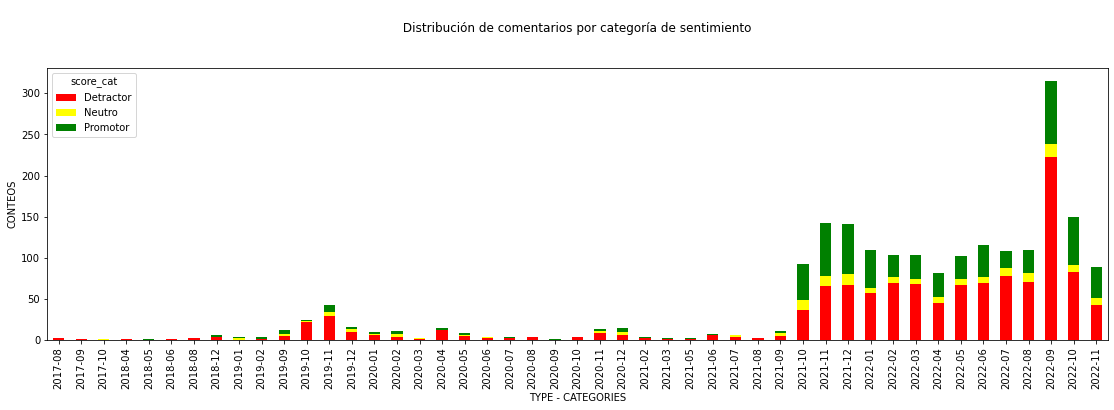

In [59]:
a=df_santadervf_ios.groupby(['mes','score_cat']).size().unstack(fill_value=0)
a.plot(kind='bar', stacked=True,figsize=(19,5),color=('red','yellow','green'),
       xlabel='TYPE - CATEGORIES',ylabel='CONTEOS',title='\n Distribución de comentarios por categoría de sentimiento \n\n')
print("\n\n APP STORE - IOS")

Observo que previo a octubre de 2021 no había comentarios en la store de apple para la aplicación de SuperMóvil, y en adelante el promedio son entre 100 y 150 comentarios por mes entre los cuáles predominan principalmente comentarios negativos, incluso en el mes de septiembre se observó un pico en el volumen de comentarios.



 GOOGLE STORE - ANDROID


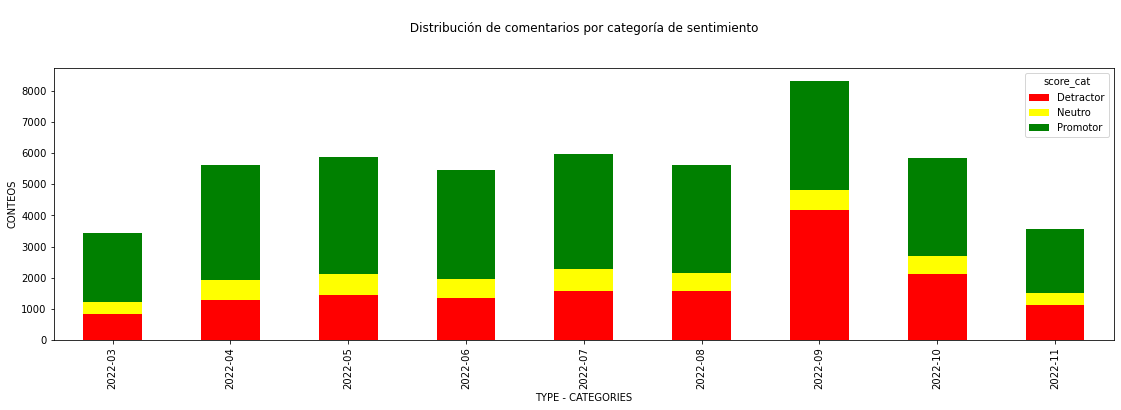

In [60]:
a=df_santadervf.groupby(['mes','score_cat']).size().unstack(fill_value=0)
a.plot(kind='bar', stacked=True,figsize=(19,5),color=('red','yellow','green'),
       xlabel='TYPE - CATEGORIES',ylabel='CONTEOS',title='\n Distribución de comentarios por categoría de sentimiento \n\n')
print("\n\n GOOGLE STORE - ANDROID")

En los comentarios obtenidos de la aplicación de la tienda de Google Play las volumetrías son altas, con un promedio de 5k comentarios mensuales, a diferencia de la tienda de apple store, aquí los comentarios predominantes son los positivos y como similitud en septiembre también se observa un pico de comentarios en el que hubo más negativos principalmente.

In [63]:
#  Homologando las bases de datos de ambas tiendas y haciendo el append
df_santadervf.rename(columns={"reviewId":"Id","userName":"nombre_usuario","thumbsUpCount":"thumbs","reviewCreatedVersion":"version_app"},inplace=True)
df_santadervf_ios.rename(columns={"index":"Id","userName":"nombre_usuario","rating":"score"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [70]:
df_santadervf["so"]="android"
df_santadervf.head(2)

<ipython-input-70-a2be8248d290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_santadervf["so"]="android"


,Id,nombre_usuario,score,thumbs,version_app,fecha,hora,score_cat,textom,mes,so
0,54693838-b5a4-495c-80a3-f95a8832d51b,Barragan (0 M),5,0,5.72,2022-11-22,16:10:59,Promotor,excelente app momento bien,2022-11,android
1,3efc9e0d-6916-4b1c-89c8-0b72f7917be0,Luis Esteban,1,1,5.72,2022-11-22,16:10:50,Detractor,peor app banco permite ingresar alertas cierra...,2022-11,android


In [71]:
df_santadervf_ios["so"]='ios'
df_santadervf_ios.head(2)

<ipython-input-71-3e18f36856bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_santadervf_ios["so"]='ios'


,Id,nombre_usuario,score,title,fecha,hora,score_cat,textom,mes,so
276,276,iguana chiquita,5,Me encanto,2022-11-21,20:59:17,Promotor,facil super mejorado muchas gracias,2022-11,ios
280,280,mimis rojas,5,Sucursal,2022-11-21,20:43:18,Promotor,aplicacion totalmente banco ningun motivo siem...,2022-11,ios


In [72]:
df_santader=df_santadervf.append(df_santadervf_ios)

In [76]:
#  Observando el conjunto de datos compactado
df_santader.tail(4)

,Id,nombre_usuario,score,thumbs,version_app,fecha,hora,score_cat,textom,mes,so,title
3,3,Fabby Montes,4,NaN,NaN,2017-10-06,15:52:11,Neutro,buena aplicacion falta informacion tarjetas de...,2017-10,ios,Buena
278,278,Davocastro,1,NaN,NaN,2017-09-20,19:00:53,Detractor,das alta super token aplicacion jamas activa bien,2017-09,ios,Porqueria de banco
10,10,Danna Laurent,1,NaN,NaN,2017-08-29,17:04:17,Detractor,disponible intente mas tarde actualizacion per...,2017-08,ios,UN ASCO DE APLICACIÓN
279,279,Fam-lofish,1,NaN,NaN,2017-08-24,00:38:21,Detractor,importante tambien,2017-08,ios,Cuando estará lista para iwatch??




 COMENTARIOS APLICACIÓN SUPERMÓVIL EN TIENDAS


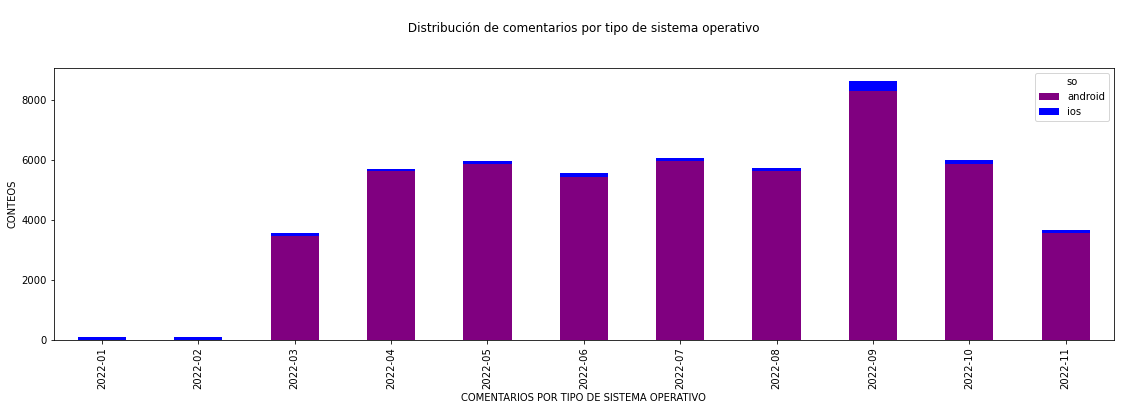

In [79]:
a=df_santader[df_santader["mes"].str.contains("2022")].groupby(['mes','so']).size().unstack(fill_value=0)
a.plot(kind='bar', stacked=True,figsize=(19,5),color=('purple','blue'),
       xlabel='COMENTARIOS POR TIPO DE SISTEMA OPERATIVO',ylabel='CONTEOS',title='\n Distribución de comentarios por tipo de sistema operativo \n\n')
print("\n\n COMENTARIOS APLICACIÓN SUPERMÓVIL EN TIENDAS")

Observo que los comentarios provienen principalmente de la tienda de Google Play comparado con la de App Store.

## Conclusiones

Dentro de los avances del proceso y ante la metodología planteada he realizado el scraping a la fuente de datos con la que trabajaré, he realizado también el proceso de preprocesamiento en el que quité caracteres especiales, pase a minúsculas, quité palabras stopwords que python tiene por defecto.
Generé el dataset final con el que comenzaré el análisis exploratorio del campo de texto.

## Referencias

    SuperMóvil https://play.google.com/store/apps/details?id=mx.bancosantander.supermovil&hl=es 
    SuperMóvil https://apps.apple.com/mx/app/santander-superm%C3%B3vil/id498944221
    Chong. Sentiment Analysis and Topic Extraction of the Twitter Network of #Prayforparis
    Yeun Kim. Modeling Topic Extraction-based Sentiment Analysis Based on User Reviews
    Gabriele Pergola_, Lin Gui, Yulan He. A Topic-Dependent Attention Model for Sentiment Analysis
    I.V. (2019, 6 noviembre). Tipos de gráficos y diagramas para la visualización de datos. ingeniovirtual.com. Recuperado 18 de marzo de 2022, de https://www.ingeniovirtual.com/tipos-de-graficos-y-diagramas-para-la-visualizacion-de-datos/
    Tableau Software. Maila Hardin, Daniel Hom, Ross Perez y Lori Williams. ¿Qué tabla o gráfico es el adecuado para usted? Recuperado 18 de marzo de 2022.
    IBM Analytics. Metodología Fundamental para la Ciencia de Datos. https://www.ibm.com/downloads/cas/6RZMKDN8
